                            # Problem Statement: HOUSING: PRICE PREDICTION
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?
Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.
Technical Requirements:
• Data contains 1460 entries each having 81 variables.
• Data contains Null values. You need to treat them using the domain knowledge and your own understanding.
• Extensive EDA has to be performed to gain relationships of important variable and price.
• Data contains numerical as well as categorical variable. You need to handle them accordingly.
• You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper
Parameters.
• You need to find important features which affect the price positively or negatively.
• Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on
test.csv file.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Setting option to display all the columns in dataset
pd.set_option('display.max_columns', 500)
# Setting option to display 300 rows in dataset
pd.set_option('display.max_rows', 500)
# Setting plot style to ggplot
plt.style.use('ggplot')

In [12]:
# Import required libaries for Ridge, Lasso and GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [13]:
df_test = pd.read_csv('/Users/prabhuswamikallur/Desktop/Internship/Project-Housing_splitted/test.csv')
df_train = pd.read_csv('/Users/prabhuswamikallur/Desktop/Internship/Project-Housing_splitted/train.csv')

In [14]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [15]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


# Data Exploring


In [16]:
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [17]:
len(df_test.columns)

80

In [18]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [19]:
len(df_train.columns)

81

In [20]:
df_test.isnull().sum().sum()

1407

In [21]:
df_train.columns[df_train.isna().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')

<AxesSubplot:>

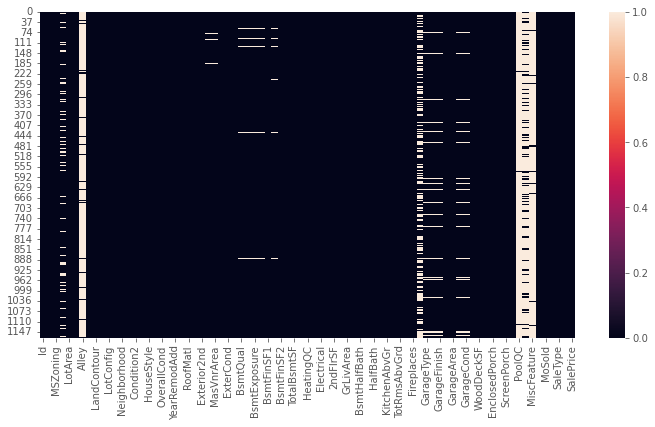

In [22]:
plt.figure(figsize=(12,6))
sns.heatmap(df_train.isnull())

In [23]:
len(df_train['Alley'])

1168

In [24]:
df_test.shape

(292, 80)

In [25]:
df_train.shape

(1168, 81)

In [26]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold
count,292.000000,292.000000,247.000000,292.000000,292.000000,292.000000,292.000000,292.000000,291.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.00000,292.000000,292.000000,275.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.0,0.0,292.000000,292.000000,292.000000
mean,755.955479,57.414384,66.425101,10645.143836,6.078767,5.493151,1972.616438,1985.294521,109.171821,439.294521,46.157534,557.315068,1042.767123,1133.691781,339.657534,3.702055,1477.051370,0.424658,0.065068,1.575342,0.359589,2.794521,1.05137,6.417808,0.595890,1979.760000,1.729452,457.458904,86.397260,47.061644,17.708904,2.489726,15.099315,0.0,NaN,28.184932,6.232877,2007.859589
std,442.565228,43.780649,21.726343,13330.669795,1.356147,1.063267,30.447016,20.105792,175.030021,429.559675,152.467119,411.043768,424.561153,366.941919,424.278825,38.219527,514.199429,0.508831,0.247070,0.547856,0.494795,0.807336,0.23616,1.728105,0.621259,23.868875,0.754430,210.785591,121.898836,65.865449,51.892906,30.247488,58.483473,0.0,NaN,224.036218,2.774556,1.322867
min,6.000000,20.000000,21.000000,1526.000000,3.000000,3.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,372.000000,0.000000,0.000000,520.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,0.000000,1916.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,1.000000,2006.000000
25%,377.750000,20.000000,53.500000,7200.000000,5.000000,5.000000,1954.000000,1968.000000,0.000000,0.000000,0.000000,255.000000,771.750000,858.000000,0.000000,0.000000,1061.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.00000,5.000000,0.000000,1964.000000,1.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,4.000000,2007.000000
50%,778.000000,50.000000,65.000000,9200.000000,6.000000,5.000000,1976.000000,1994.000000,0.000000,369.500000,0.000000,487.000000,971.000000,1047.500000,0.000000,0.000000,1440.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.00000,6.000000,1.000000,1979.000000,2.000000,467.500000,0.000000,28.500000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,6.000000,2008.000000
75%,1152.250000,70.000000,79.000000,11658.750000,7.000000,6.000000,2001.000000,2003.250000,180.000000,700.500000,0.000000,780.000000,1322.000000,1370.500000,717.000000,0.000000,1720.250000,1.000000,0.000000,2.000000,1.000000,3.000000,1.00000,7.000000,1.000000,2003.000000,2.000000,569.750000,149.250000,66.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,8.000000,2009.000000
max,1456.000000,190.000000,150.000000,215245.000000,10.000000,9.000000,2009.000000,2010.000000,1031.000000,1767.000000,1085.000000,1935.000000,3094.000000,2402.000000,1589.000000,479.000000,3447.000000,2.000000,1.000000,3.000000,2.000000,6.000000,3.00000,12.000000,2.000000,2010.000000,4.000000,1052.000000,728.000000,418.000000,330.000000,407.000000,396.000000,0.0,NaN,3500.000000,12.000000,2010.000000


In [27]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1104.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,46.647260,569.721747,1061.095034,1169.860445,348.826199,6.380137,1525.066781,0.425514,0.055651,1.562500,0.388699,2.884418,1.045377,6.542808,0.617295,1978.193841,1.776541,476.860445,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,163.520016,449.375525,442.272249,391.161983,439.696370,50.892844,528.042957,0.521615,0.236699,0.551882,0.504929,0.817229,0.216292,1.598484,0.650575,24.890704,0.745554,214.466769,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,216.000000,799.000000,892.000000,0.000000,0.000000,1143.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,0.000000,474.000000,1005.500000,1096.500000,0.000000,0.000000,1468.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,0.000000,816.000000,1291.500000,1392.000000,729.000000,0.000000,1795.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

Checking NULL values


In [29]:
import missingno as mno

<AxesSubplot:>

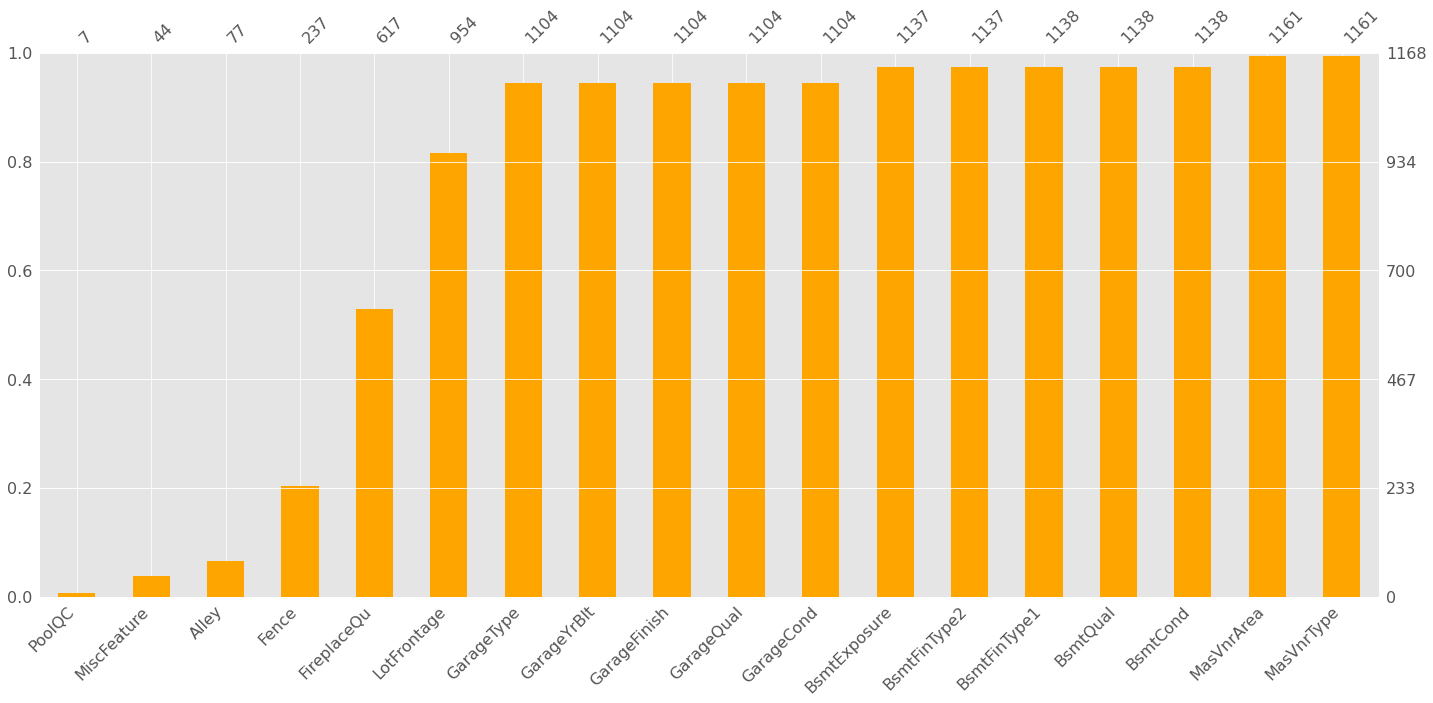

In [30]:
mno.bar(df_train[df_train.columns[df_train.isna().any()]], sort = 'ascending', color = 'orange')

As we can see from the above plot that 18 columns have null values from least to the most

In [31]:
# Getting total number of NULL values and percentage of the columns
# null_columns = df.columns[df.isna().any()]
null_value_count = df_train[df_train.columns[df_train.isna().any()]].isna().sum().sort_values(ascending=False)
null_percentage = (df_train[df_train.columns[df_train.isna().any()]].isna().sum() * 100 / df_train.shape[0]).sort_values(ascending=False)

In [32]:
null_data = pd.concat([null_value_count, null_percentage], axis=1, keys=['Count', 'Percentage'])

In [33]:
null_data

,Count,Percentage
PoolQC,1161,99.400685
MiscFeature,1124,96.232877
Alley,1091,93.407534
Fence,931,79.708904
FireplaceQu,551,47.174658
LotFrontage,214,18.321918
GarageType,64,5.479452
GarageYrBlt,64,5.479452
GarageFinish,64,5.479452
GarageQual,64,5.479452


Dropping NULL values of columns above 15%

In [34]:
null_data[ null_data['Percentage'] > 15].index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
       'LotFrontage'],
      dtype='object')

In [35]:
# Dropping these columns from the dataframe `df`
df_train.drop(columns=null_data[ null_data['Percentage'] > 15].index, inplace=True)

In [36]:
df_train

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,0,2,2007,WD,Normal,128000
1,889,20,RL,15865,Pave,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,0,10,2007,WD,Normal,268000
2,793,60,RL,9920,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,0,6,2007,WD,Normal,269790
3,110,20,RL,11751,Pave,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,0,1,2010,COD,Normal,190000
4,422,20,RL,16635,Pave,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,9819,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,BrkFace,31.0,TA,Gd,CBlock,TA,TA,No,BLQ,450,Unf,0,432,882,GasA,TA,Y,SBrkr,900,0,0,900,0,0,1,0,3,1,TA,5,Typ,0,Detchd,1970.0,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,0,2,2010,WD,Normal,122000
1164,554,20,RL,8777,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,4,5,1949,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1126,0,0,1126,0,0,2,0,2,1,Gd,5,Typ,0,Detchd,2002.0,Fin,2,520,TA,TA,N,0,96,0,0,0,0,0,5,2009,WD,Normal,108000
1165,196,160,RL,2280,Pave,Reg,Lvl,AllPub,FR2,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,6,6,1976,1976,Gable,CompShg,Plywood,Brk Cmn,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,566,Unf,0,289,855,GasA,TA,Y,SBrkr,855,601,0,1456,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1976.0,Unf,2,440,TA,TA,Y,87,0,0,0,0,0,0,7,2009,WD,Normal,148500
1166,31,70,C (all),8500,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,GasA,TA,N,SBrkr,649,668,0,1317,0,0,1,0,3,1,TA,6,Typ,0,Detchd,1920.0,Unf,1,250,TA,Fa,N,0,54,172,0,0,0,0,7,2008,WD,Normal,40000


In [37]:
df_train.shape

(1168, 75)

In [38]:
null_data = null_data[null_data['Percentage'] < 15]
null_data

,Count,Percentage
GarageType,64,5.479452
GarageYrBlt,64,5.479452
GarageFinish,64,5.479452
GarageQual,64,5.479452
GarageCond,64,5.479452
BsmtExposure,31,2.654110
BsmtFinType2,31,2.654110
BsmtCond,30,2.568493
BsmtFinType1,30,2.568493
BsmtQual,30,2.568493


Checking the data in the columns with NULL values less than 15%

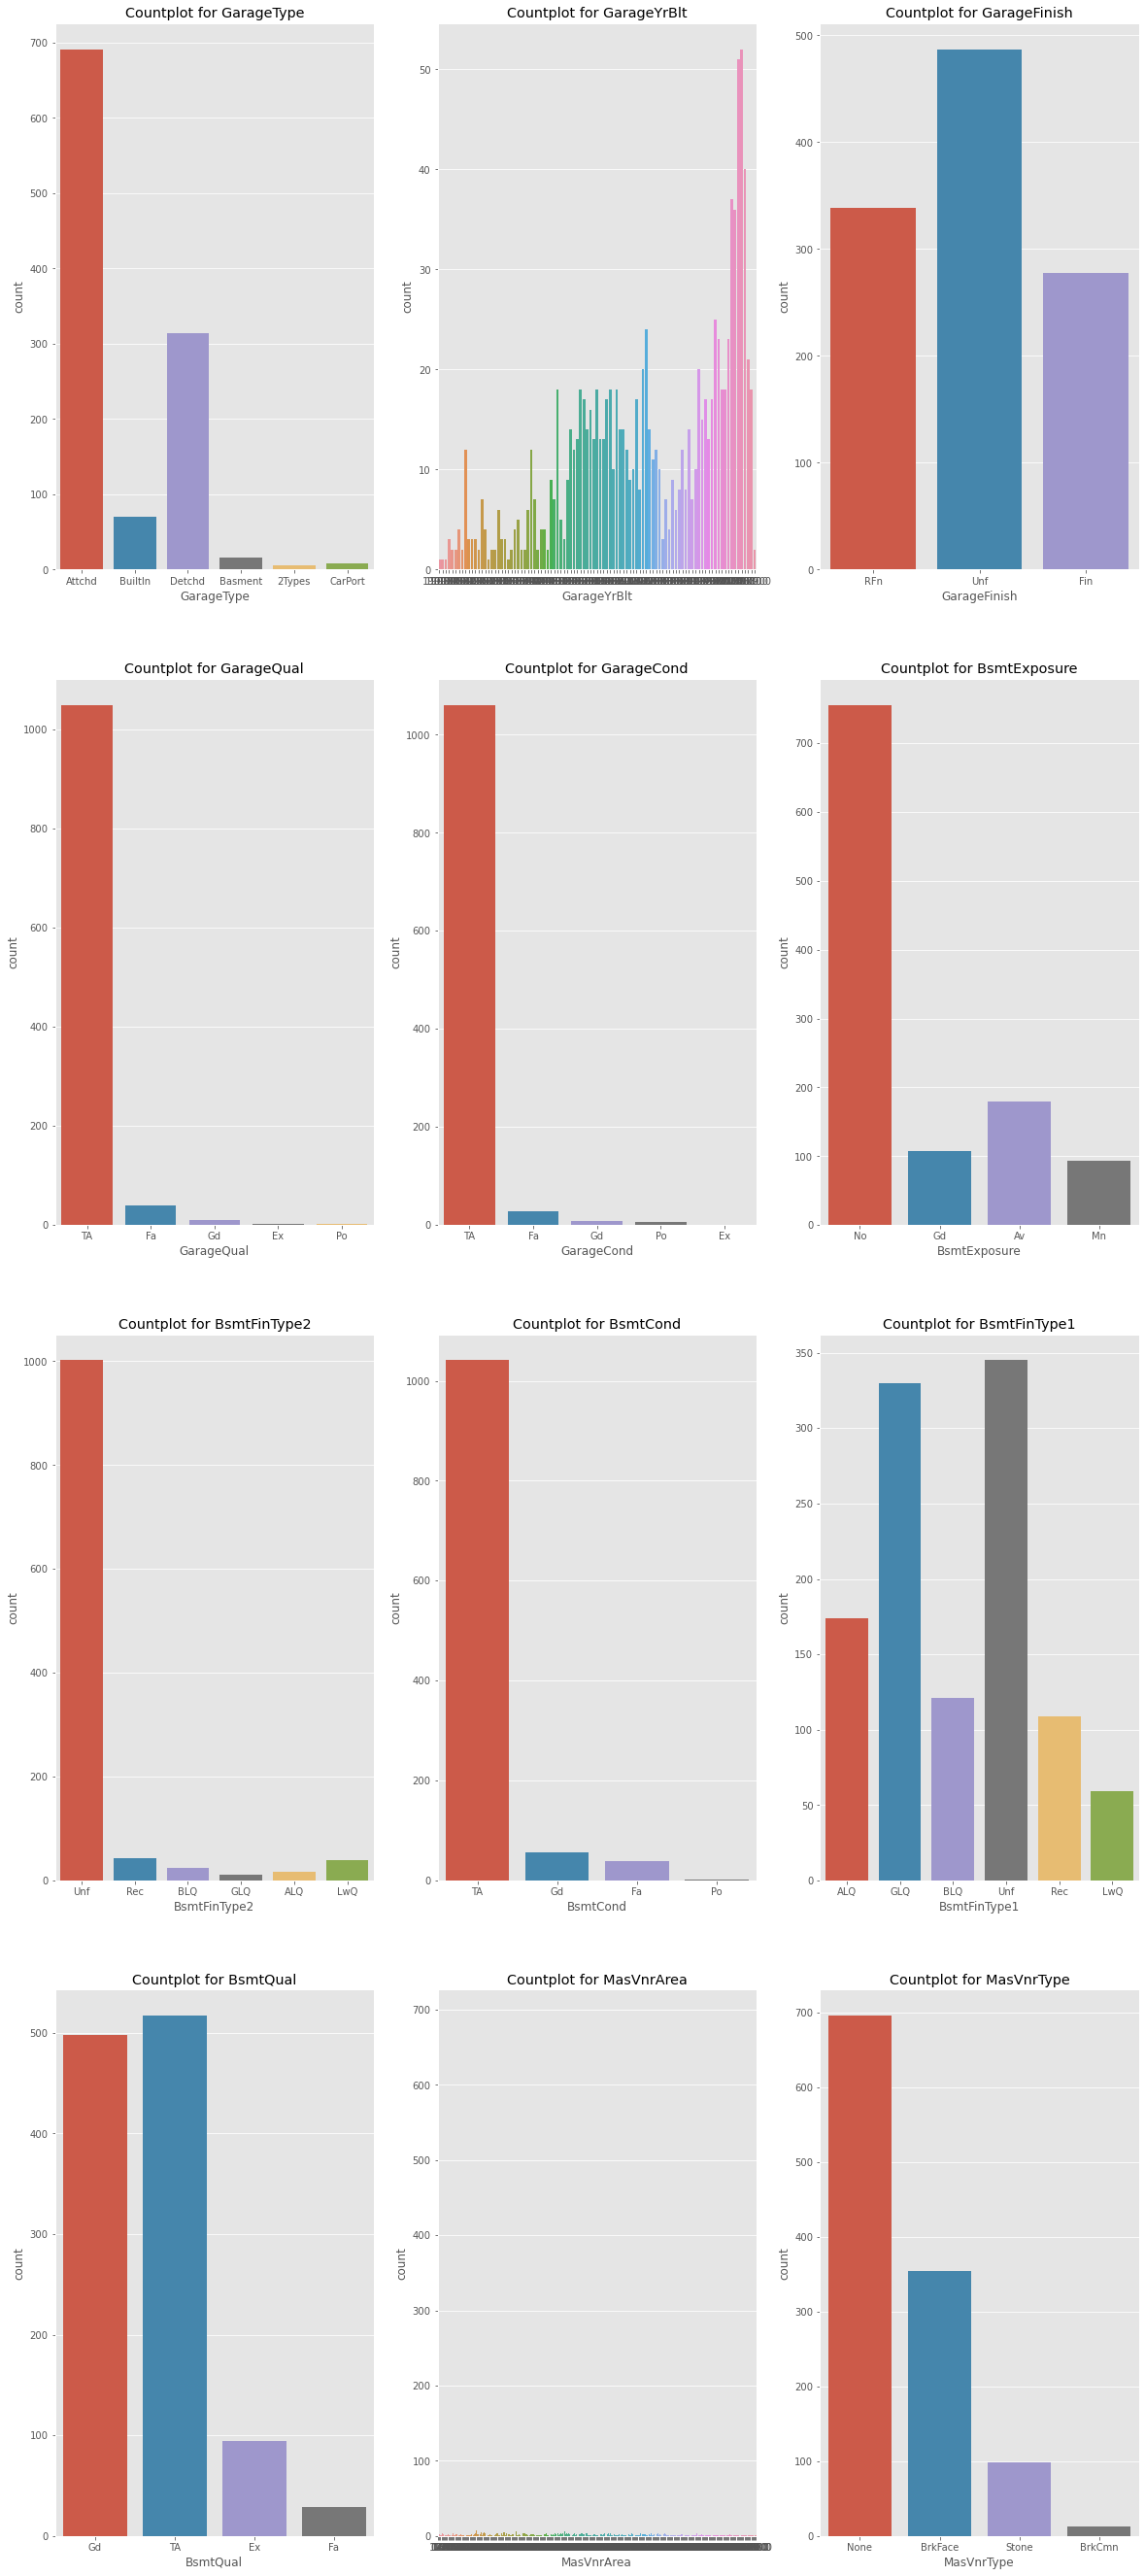

In [39]:
plt.figure(figsize=[20, 60])

for i, var in enumerate(null_data.index,start=1):
    plt.subplot(5,3,i)
    sns.countplot(df_train[var])
    plt.title(f"Countplot for {var}")

We will perform below aproaches to impute the columns:
categorical column - use mode() to replace the missing values
Numerical column - use median() to replace the missing values
Column value NA has a meaningful value (e.g. GarageType = NA refers to "No Garage"). We will replace these values with None



In [40]:
# Impute "GarageType" with 'None' as it has a meaningful value
df_train['GarageType'].fillna('None', inplace=True)

In [41]:
# Impute "GarageYrBlt" with Median value
df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].median(), inplace=True)

In [42]:
# Impute "GarageFinish" with 'None' as it has a meaningful value
df_train['GarageFinish'].fillna('None', inplace=True)

In [43]:
# Impute "GarageQual" with 'None' as it has a meaningful value
df_train['GarageQual'].fillna('None', inplace=True)

In [44]:
# Impute "GarageQual" with 'None' as it has a meaningful value
df_train['GarageCond'].fillna('None', inplace=True)

In [45]:
# Impute "BsmtExposure" with 'None' as it has a meaningful value
df_train['BsmtExposure'].fillna('None', inplace=True)

In [46]:
# Impute "BsmtFinType2" with 'None' as it has a meaningful value
df_train['BsmtFinType2'].fillna('None', inplace=True)

In [47]:
# Impute "BsmtFinType1" with 'None' as it has a meaningful value
df_train['BsmtFinType1'].fillna('None', inplace=True)

In [48]:
# Impute "BsmtCond" with 'None' as it has a meaningful value
df_train['BsmtCond'].fillna('None', inplace=True)

In [49]:
# Impute "BsmtQual" with 'None' as it has a meaningful value
df_train['BsmtQual'].fillna('None', inplace=True)

In [50]:
# Impute "MasVnrArea" with Median value
df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].median(), inplace=True)

In [51]:
# Impute "MasVnrType" with Mode value
df_train['MasVnrType'].fillna(df_train['MasVnrType'].mode()[0], inplace=True)

In [52]:
# Impute "Electrical" with Mode value
val = df_train['Electrical'].mode()[0]
df_train['Electrical'].fillna(val, inplace=True)

In [53]:
null_value_count = df_train[df_train.columns[df_train.isna().any()]].isna().sum().sort_values(ascending=False)
null_percentage = (df_train[df_train.columns[df_train.isna().any()]].isna().sum() * 100 / df_train.shape[0]).sort_values(ascending=False)
null_data = pd.concat([null_value_count, null_percentage], axis=1, keys=['Count', 'Percentage'])
null_data

,Count,Percentage


Dropping few columns which aren't important
We will be dropping the columns based on:

If the variance in the column is very less, then it provides little scope for the model to learn. So will be dropping these columns
Few columns are not important such as Id as they don't provide any meaningful insights. So will remove these as well

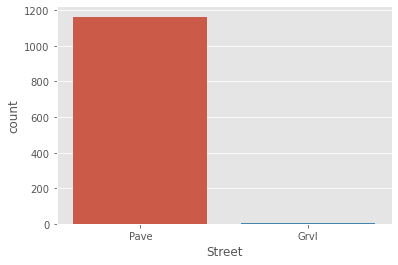

In [54]:
# Dropping "Street" as it doesn't contain much variance. Most values are assigned to "Pave"
sns.countplot(df_train['Street'])
df_train.drop(columns='Street', inplace=True)

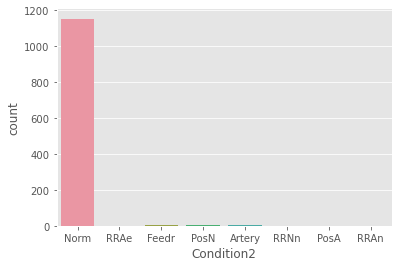

In [55]:
# Dropping "Condition2" as it doesn't contain much variance. Most values are assigned to "Norm"
sns.countplot(df_train['Condition2'])
df_train.drop(columns='Condition2', inplace=True)

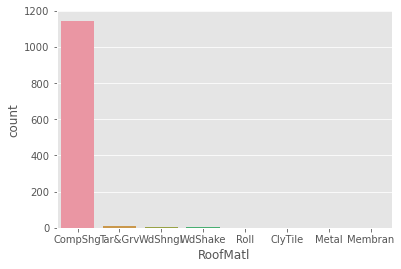

In [56]:
# Dropping "RoofMatl" as it doesn't contain much variance. Most values are assigned to "CompShg"
sns.countplot(df_train['RoofMatl'])
df_train.drop(columns='RoofMatl', inplace=True)

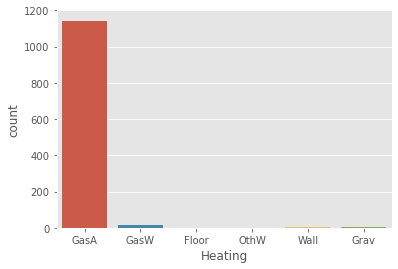

In [57]:
# Dropping "Heating" as it doesn't contain much variance. Most values are assigned to "GasA"
sns.countplot(df_train['Heating'])
df_train.drop(columns='Heating', inplace=True)

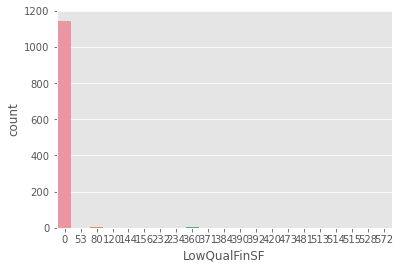

In [58]:
# Dropping "LowQualFinSF" as it doesn't contain much variance. Most values are assigned to "0"
sns.countplot(df_train['LowQualFinSF'])
df_train.drop(columns='LowQualFinSF', inplace=True)

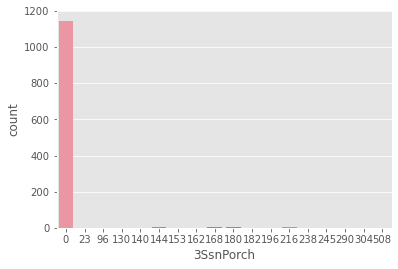

In [59]:
# Dropping "3SsnPorch" as it doesn't contain much variance. Most values are assigned to "0"
sns.countplot(df_train['3SsnPorch'])
df_train.drop(columns='3SsnPorch', inplace=True)

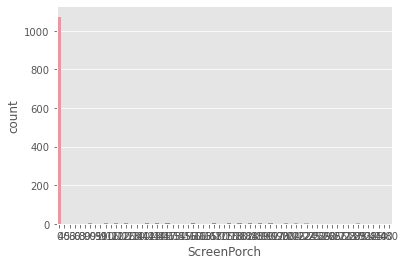

In [60]:
# Dropping "ScreenPorch" as it doesn't contain much variance. Most values are assigned to "0"
sns.countplot(df_train['ScreenPorch'])
df_train.drop(columns='ScreenPorch', inplace=True)

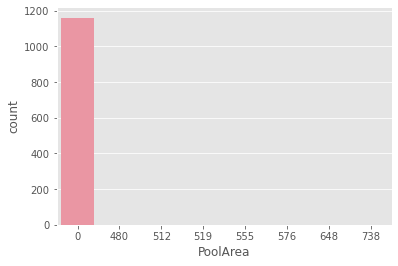

In [61]:
# Dropping "PoolArea" as it doesn't contain much variance. Most values are assigned to "0"
sns.countplot(df_train['PoolArea'])
df_train.drop(columns='PoolArea', inplace=True)

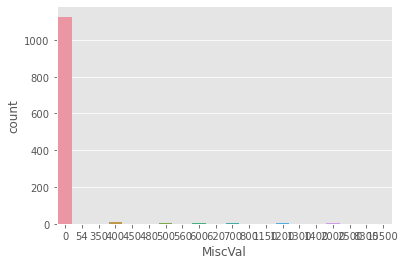

In [62]:
# Dropping "MiscVal" as it doesn't contain much variance. Most values are assigned to "0"
sns.countplot(df_train['MiscVal'])
df_train.drop(columns='MiscVal', inplace=True)

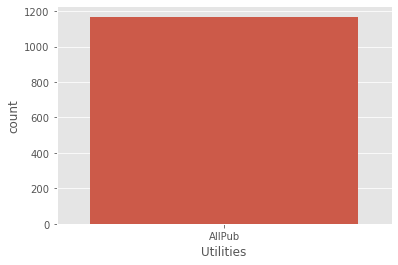

In [63]:
# Dropping "Utilities" as it doesn't contain much variance. Most values are assigned to "AllPub"
sns.countplot(df_train['Utilities'])
df_train.drop(columns='Utilities', inplace=True)

In [64]:
# Dropping "Id" columns as it's not important
df_train.drop(columns='Id', inplace=True)

Checking the data after dropping unimportant columns

In [65]:
df_train.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,4928,IR1,Lvl,Inside,Gtl,NPkVill,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,TA,Y,SBrkr,958,0,958,0,0,2,0,2,1,TA,5,Typ,1,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,2,2007,WD,Normal,128000
1,20,RL,15865,IR1,Lvl,Inside,Mod,NAmes,Norm,1Fam,1Story,8,6,1970,1970,Flat,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,Ex,Y,SBrkr,2217,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,10,2007,WD,Normal,268000
2,60,RL,9920,IR1,Lvl,CulDSac,Gtl,NoRidge,Norm,1Fam,2Story,7,5,1996,1997,Gable,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,Ex,Y,SBrkr,1127,886,2013,1,0,2,1,3,1,TA,8,Typ,1,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,6,2007,WD,Normal,269790
3,20,RL,11751,IR1,Lvl,Inside,Gtl,NWAmes,Norm,1Fam,1Story,6,6,1977,1977,Hip,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,Ex,Y,SBrkr,1844,0,1844,0,0,2,0,3,1,TA,7,Typ,1,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,1,2010,COD,Normal,190000
4,20,RL,16635,IR1,Lvl,FR2,Gtl,NWAmes,Norm,1Fam,1Story,6,7,1977,2000,Gable,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,Gd,Y,SBrkr,1602,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,6,2009,WD,Normal,215000


In [66]:
df_train.shape

(1168, 64)

Year columns
We have 4 year columns. With this, we will create Age columns that track the time in year and remove these columns.
Age will be calculated by subtracting the Year from the current Year for each column.

YearBuilt
YearRemodAdd
GarageYrBlt
YrSold

In [67]:
CurrentYear = 2022

In [68]:
df_train['Age_Built_Years'] = CurrentYear - df_train['YearBuilt']
df_train['Age_RemodAdd_Years'] = CurrentYear - df_train['YearRemodAdd']
df_train['Age_GarageYrBlt_Years'] = CurrentYear - df_train['GarageYrBlt']
df_train['Age_YrSold_Years'] = CurrentYear - df_train['YrSold']

In [69]:
df_train.drop(columns=['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'], inplace=True)

In [70]:
df_train.shape

(1168, 64)

In [71]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 64 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MSSubClass             1168 non-null   int64  
 1   MSZoning               1168 non-null   object 
 2   LotArea                1168 non-null   int64  
 3   LotShape               1168 non-null   object 
 4   LandContour            1168 non-null   object 
 5   LotConfig              1168 non-null   object 
 6   LandSlope              1168 non-null   object 
 7   Neighborhood           1168 non-null   object 
 8   Condition1             1168 non-null   object 
 9   BldgType               1168 non-null   object 
 10  HouseStyle             1168 non-null   object 
 11  OverallQual            1168 non-null   int64  
 12  OverallCond            1168 non-null   int64  
 13  RoofStyle              1168 non-null   object 
 14  Exterior1st            1168 non-null   object 
 15  Exte

In [72]:
# Getting categorical variables
cat_var = df_train.select_dtypes(include='object').columns
cat_var

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [73]:
# Getting numerical variables
num_var = df_train.select_dtypes(exclude='object').columns
num_var

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'SalePrice', 'Age_Built_Years',
       'Age_RemodAdd_Years', 'Age_GarageYrBlt_Years', 'Age_YrSold_Years'],
      dtype='object')

Checking the distribution of target variable -SalePrice

<Figure size 1440x1080 with 0 Axes>

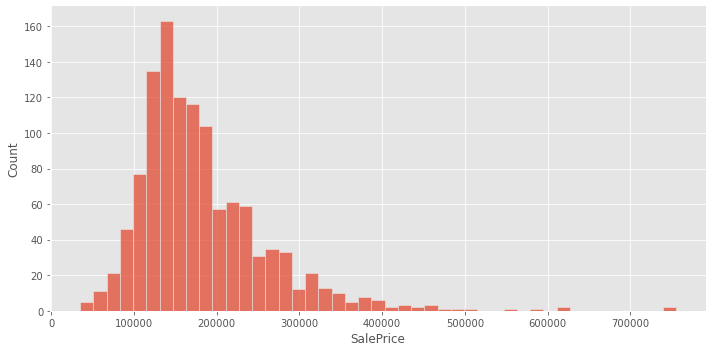

In [74]:
plt.figure(figsize=[20,15])
sns.displot(df_train['SalePrice'], aspect=2)
plt.show()

Observation:
Looking at the plot, distribution is skewed towards the right (i.e. outliers on data with high Sales Price). This indicates the presence of outliers.
In such cases, we cannot cap the values as Linear Regression models are interpolated and not extrapolated (i.e. Model will make wrong predictions in case of high Sales Prices).

Checking skew value of SalesPrice

In [75]:
df_train['SalePrice'].skew()

1.953877705368286

Skewness:
If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed
If the skewness is less than -1 or greater than 1, the data are highly skewed

As skewness is more than 1, we conclude that the column SalePrice is highly skewed

Checking kurtosis value of SalePrice

In [76]:
df_train['SalePrice'].kurtosis()

7.390656691648756

Observation:
kurtosis measures the tail-heaviness of the distribution
For a normal distribution, kurtosis value is 3
As kurtosis value increase, the tail heaviness also increases and vice-versa

As kurtosis value is morw than 7, distribution tail is heavier

Handling SalePrice high skewness and kurtosis

We will perform Log Transformation on "SalePrice" column. This will transform the variable and make it as normally distributed as possible. Basically it reduces the skewness in the data.

<Figure size 1440x1080 with 0 Axes>

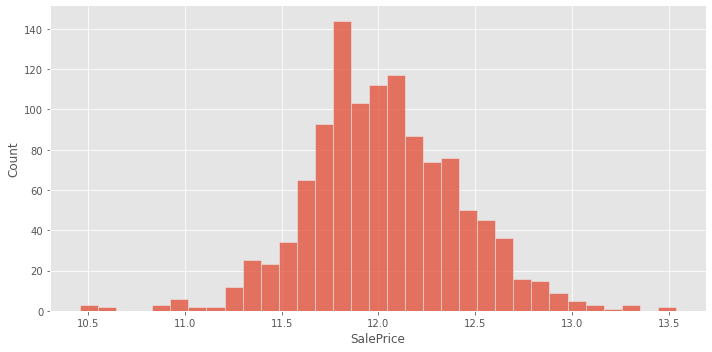

In [77]:
# Plotting distribution of a log transformed "SalePrice" column
plt.figure(figsize=[20,15])
sns.displot(np.log(df_train['SalePrice']), aspect=2)
plt.show()

Now the plot shows almost normally distributed data.

In [78]:
# Create Log Transformed "SalePrice" column
df_train['Transformed_SalePrice'] = np.log(df_train['SalePrice'])

<Figure size 1440x1080 with 0 Axes>

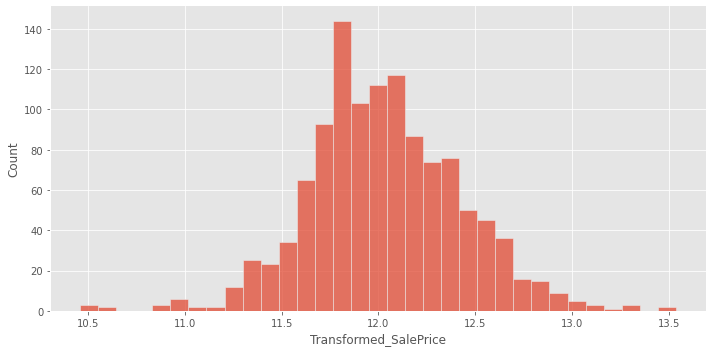

In [79]:
# Plotting distribution of a "Transformed_SalePrice" column
plt.figure(figsize=[20,15])
sns.displot(df_train['Transformed_SalePrice'], aspect=2)
plt.show()

In [80]:
df_train.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,SaleType,SaleCondition,SalePrice,Age_Built_Years,Age_RemodAdd_Years,Age_GarageYrBlt_Years,Age_YrSold_Years,Transformed_SalePrice
0,120,RL,4928,IR1,Lvl,Inside,Gtl,NPkVill,Norm,TwnhsE,1Story,6,5,Gable,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,TA,Y,SBrkr,958,0,958,0,0,2,0,2,1,TA,5,Typ,1,Attchd,RFn,2,440,TA,TA,Y,0,205,0,2,WD,Normal,128000,46,46,45.0,15,11.759786
1,20,RL,15865,IR1,Lvl,Inside,Mod,NAmes,Norm,1Fam,1Story,8,6,Flat,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,Ex,Y,SBrkr,2217,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,Attchd,Unf,2,621,TA,TA,Y,81,207,0,10,WD,Normal,268000,52,52,52.0,15,12.498742
2,60,RL,9920,IR1,Lvl,CulDSac,Gtl,NoRidge,Norm,1Fam,2Story,7,5,Gable,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,Ex,Y,SBrkr,1127,886,2013,1,0,2,1,3,1,TA,8,Typ,1,Attchd,Unf,2,455,TA,TA,Y,180,130,0,6,WD,Normal,269790,26,25,25.0,15,12.505399
3,20,RL,11751,IR1,Lvl,Inside,Gtl,NWAmes,Norm,1Fam,1Story,6,6,Hip,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,Ex,Y,SBrkr,1844,0,1844,0,0,2,0,3,1,TA,7,Typ,1,Attchd,RFn,2,546,TA,TA,Y,0,122,0,1,COD,Normal,190000,45,45,45.0,12,12.154779
4,20,RL,16635,IR1,Lvl,FR2,Gtl,NWAmes,Norm,1Fam,1Story,6,7,Gable,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,Gd,Y,SBrkr,1602,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,Attchd,Fin,2,529,TA,TA,Y,240,0,0,6,WD,Normal,215000,45,22,45.0,13,12.278393


In [81]:
df_train.shape

(1168, 65)

Exploratory Data Analysis

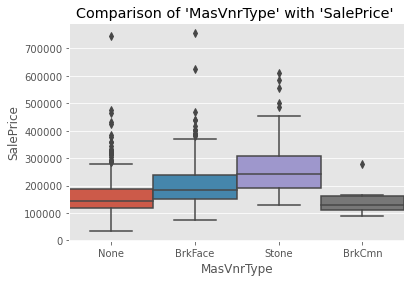

In [82]:
var = 'MasVnrType'
sns.boxplot(x=var, y='SalePrice', data=df_train, width=1)
plt.title(f"Comparison of '{var}' with 'SalePrice' ")
plt.show()

Stone Masonry Veneer Type has higher median Sales Price compared to other Veneer Types

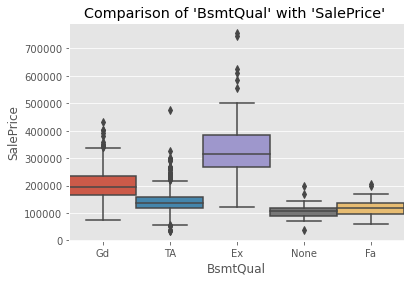

In [83]:
var = 'BsmtQual'
sns.boxplot(x=var, y='SalePrice', data=df_train, width=1)
plt.title(f"Comparison of '{var}' with 'SalePrice' ")
plt.show()

As Basement quality increases from Fair to Excellent, we see a corresponding increase in SalePrice

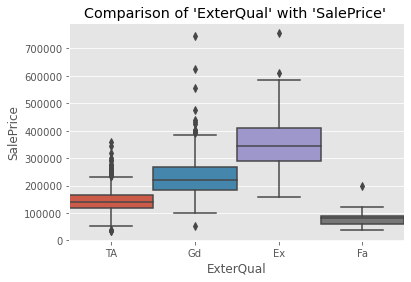

In [84]:
var = 'ExterQual'
sns.boxplot(x=var, y='SalePrice', data=df_train, width=1)
plt.title(f"Comparison of '{var}' with 'SalePrice' ")
plt.show()

As Exterior quality increases from Fair to Excellent, we see a corresponding increase in SalePrice

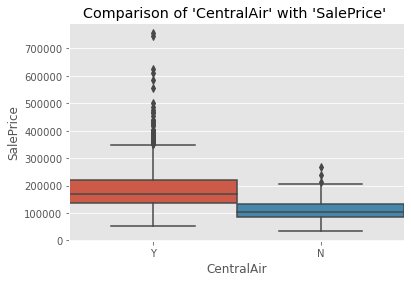

In [85]:
var = 'CentralAir'
sns.boxplot(x=var, y='SalePrice', data=df_train, width=1)
plt.title(f"Comparison of '{var}' with 'SalePrice' ")
plt.show()

Houses with Central Air conditioning have a higher median price compared to the houses that don't have Central Air conditioning

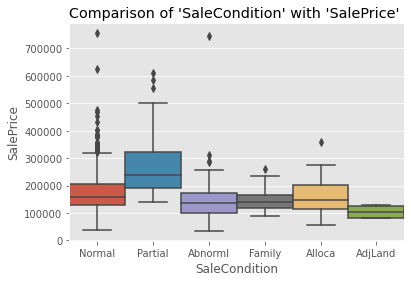

In [86]:
var = 'SaleCondition'
sns.boxplot(x=var, y='SalePrice', data=df_train, width=1)
plt.title(f"Comparison of '{var}' with 'SalePrice' ")
plt.show()

Houses that are partially completed have a higher median Saleprice compared to other categories. This might be because partially completed houses are usually new houses under construction.

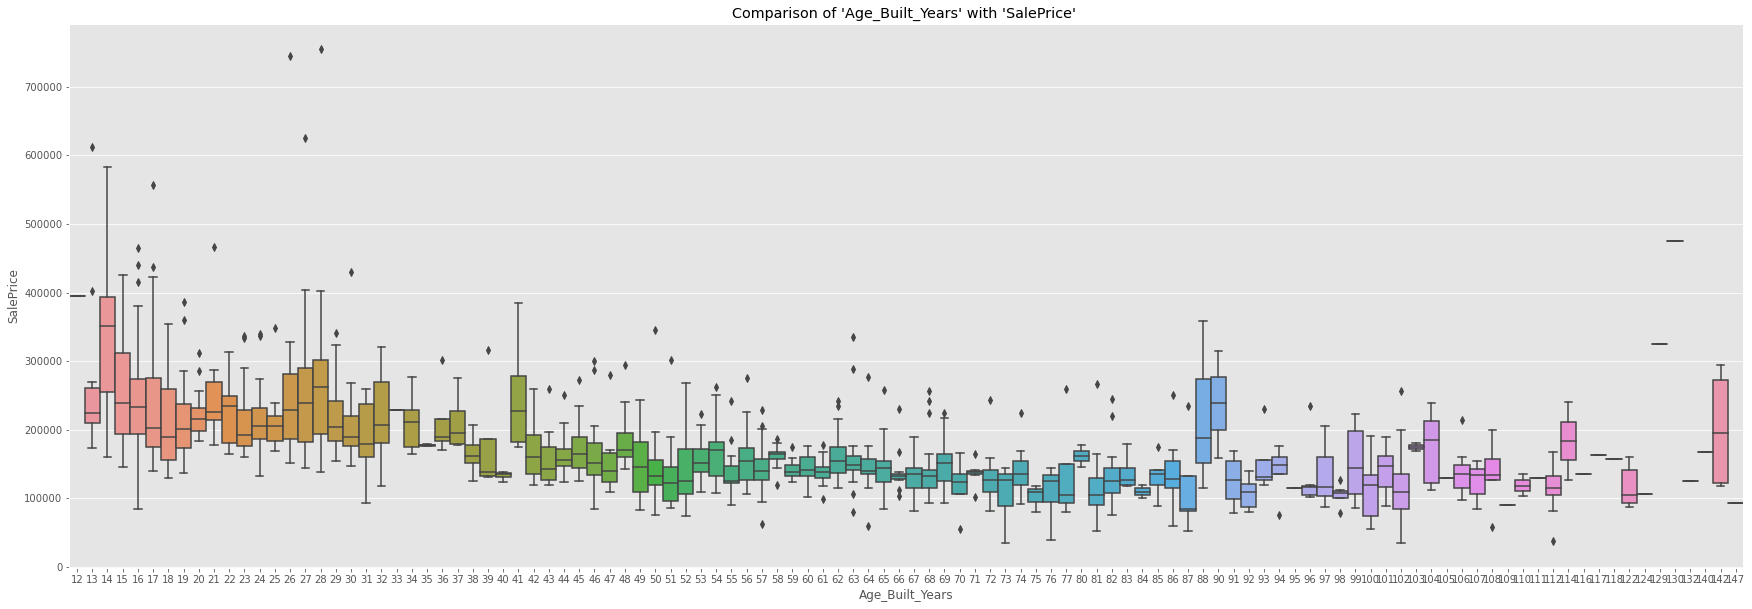

In [87]:
plt.figure(figsize=[30,10])
var = 'Age_Built_Years'
sns.boxplot(x=var, y='SalePrice', data=df_train, width=1)
plt.title(f"Comparison of '{var}' with 'SalePrice' ")
plt.show()

As the house age increases, we can see that the median SalePrice drops but there are few cases where the SalePrice goes up as well

Creating a correlation matrix and heatmap

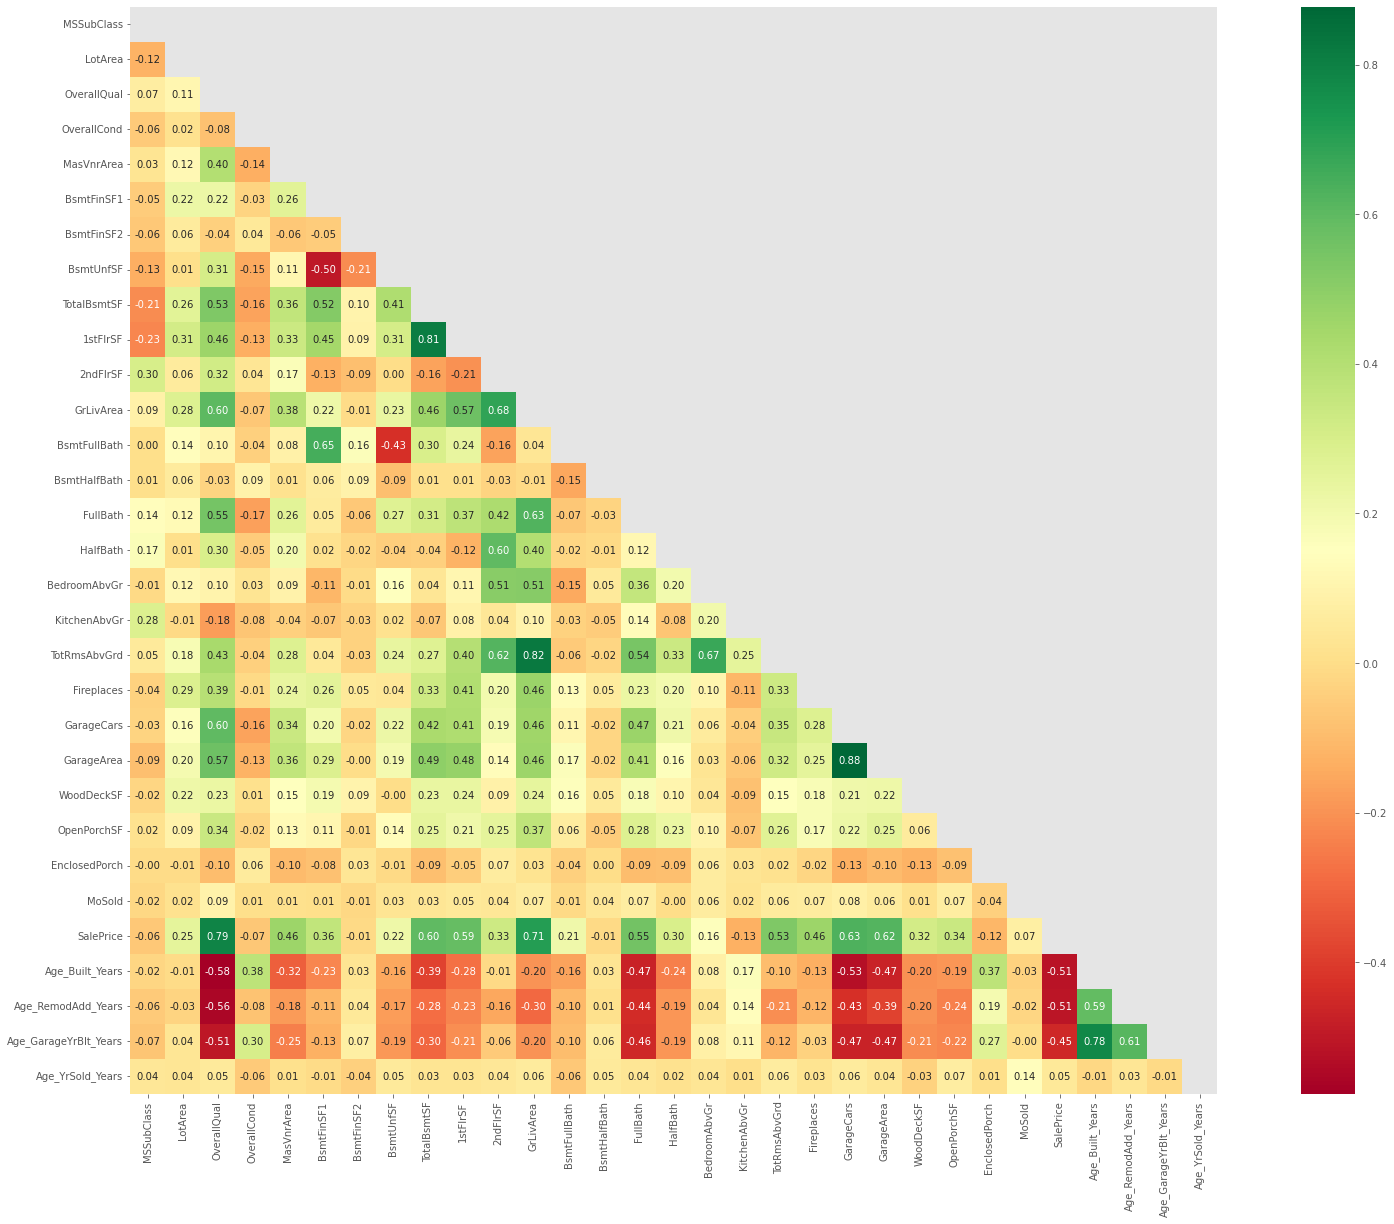

In [88]:
plt.figure(figsize=[30,20])
corr = df_train.drop(columns='Transformed_SalePrice', axis=1)
corr = corr.corr()
mask=np.triu(np.ones_like(corr)) # Masking upper half of the triangle
sns.heatmap(corr, cmap='RdYlGn', annot=True, fmt='.2f', square=True, mask=mask)
plt.show()

From this list, we will be picking the top 10 most correlated variables with SalePrice

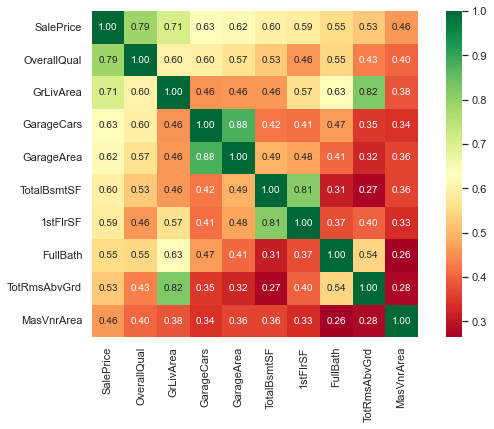

In [89]:
plt.figure(figsize=[10,6])

k = 10 # number of variables for a heatmap
cols = corr.nlargest(k,'SalePrice')['SalePrice'].index
corrmatrix = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(corrmatrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10},
                yticklabels=cols.values, xticklabels=cols.values, cmap='RdYlGn')
plt.show()

Observation:

GrLivArea and TotaRmsAvbGrad are highly correlated at 0.83
TotalBsmtSF and 1stFlrSF are highly correlated at 0.82
GarageArea and GarageCars are highly correlated at 0.88
OverallQual and SalePrice are highly correlated at o.79

In [90]:
df_train.OverallQual.unique()

array([ 6,  8,  7,  5,  9,  1,  2,  4,  3, 10])

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

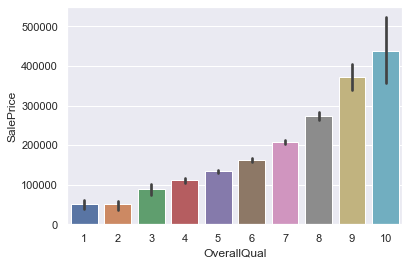

In [91]:
sns.barplot(df_train.OverallQual, df_train.SalePrice)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

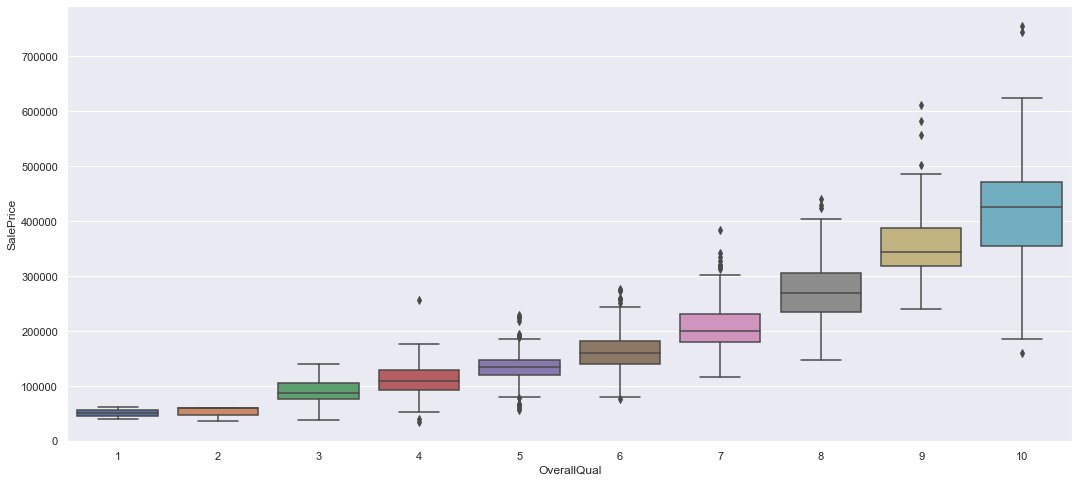

In [92]:
plt.figure(figsize=(18,8))
sns.boxplot(x=df_train.OverallQual, y=df_train.SalePrice)

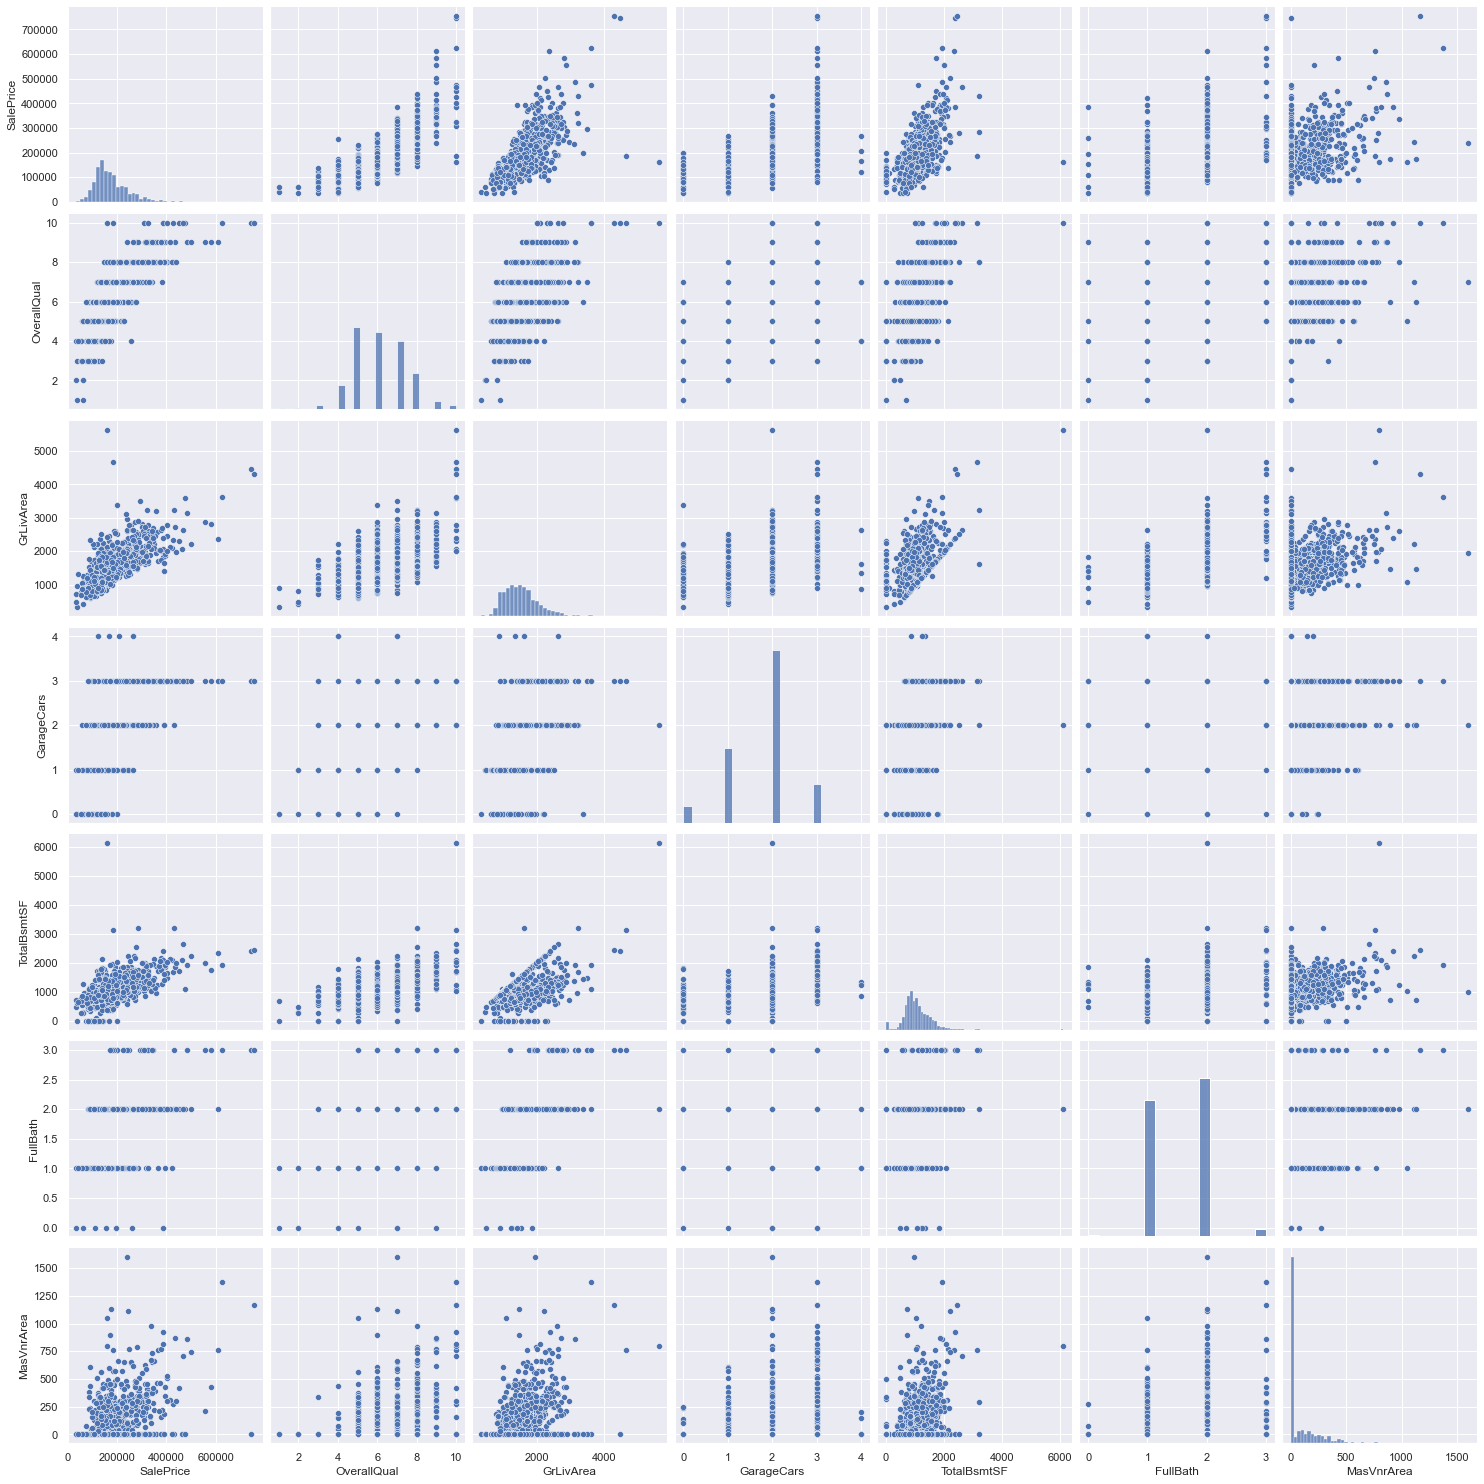

In [93]:
columns = ['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','MasVnrArea']
sns.pairplot(df_train[columns], size=3)
plt.show()

Observations:

TotalBasementSF, GrLivingArea & OverallQual are linearly correlated with SalePrice
TotalBasementSF and GrLivingArea have a positive correlation
Distribution of MasVnrArea is skewed to the right

Data Preparation

In [94]:
# Getting categorical variables
cat_var = df_train.select_dtypes(include='object').columns
print(len(cat_var))

33


Create OHE (One-Hot Encoding) for categorical columns

In [95]:
df_train_categorical = df_train.select_dtypes(include='object')

In [96]:
df_train_categorical.columns.shape

(33,)

In [97]:
# One Hot Encoding on categorical columns
df_train_dummies = pd.get_dummies(df_train_categorical, drop_first=True)

In [98]:
df_train_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,

Dropping the original categorical columns from the dataframe

In [99]:
df_train.drop(list(df_train_categorical.columns), axis=1, inplace=True)

In [100]:
df_train.shape

(1168, 32)

Merge df_train and df_train_dummies dataframes

In [101]:
df_train = pd.concat([df_train, df_train_dummies], axis=1)

In [102]:
df_train.shape

(1168, 214)

In [103]:
df_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,SalePrice,Age_Built_Years,Age_RemodAdd_Years,Age_GarageYrBlt_Years,Age_YrSold_Years,Transformed_SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,120,4928,6,5,0.0,120,0,958,1078,958,0,958,0,0,2,0,2,1,5,1,2,440,0,205,0,2,128000,46,46,45.0,15,11.759786,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,15865,8,6,0.0,351,823,1043,2217,2217,0,2217,1,0,2,0,4,1,8,1,2,621,

Divide data into X and y for building the model

In [104]:
X = df_train.drop(['SalePrice','Transformed_SalePrice'], axis=1)
y = df_train['Transformed_SalePrice']
X.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,Age_Built_Years,Age_RemodAdd_Years,Age_GarageYrBlt_Years,Age_YrSold_Years,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,120,4928,6,5,0.0,120,0,958,1078,958,0,958,0,0,2,0,2,1,5,1,2,440,0,205,0,2,46,46,45.0,15,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,15865,8,6,0.0,351,823,1043,2217,2217,0,2217,1,0,2,0,4,1,8,1,2,621,81,207,0,10,52,52,52.0,15,0,0,1,0,0,0,0,0,0,1,0,0

In [105]:
y.head()

0    11.759786
1    12.498742
2    12.505399
3    12.154779
4    12.278393
Name: Transformed_SalePrice, dtype: float64

Split data into train and test sets

In [106]:
# Import library from sklearn from train, test & split
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [108]:
print(X_train.shape)
print(y_train.shape)

(817, 212)
(817,)


In [109]:
print(X_test.shape)
print(y_test.shape)

(351, 212)
(351,)


In [110]:
df_train.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 214 columns):
 #    Column                 Non-Null Count  Dtype  
---   ------                 --------------  -----  
 0    MSSubClass             1168 non-null   int64  
 1    LotArea                1168 non-null   int64  
 2    OverallQual            1168 non-null   int64  
 3    OverallCond            1168 non-null   int64  
 4    MasVnrArea             1168 non-null   float64
 5    BsmtFinSF1             1168 non-null   int64  
 6    BsmtFinSF2             1168 non-null   int64  
 7    BsmtUnfSF              1168 non-null   int64  
 8    TotalBsmtSF            1168 non-null   int64  
 9    1stFlrSF               1168 non-null   int64  
 10   2ndFlrSF               1168 non-null   int64  
 11   GrLivArea              1168 non-null   int64  
 12   BsmtFullBath           1168 non-null   int64  
 13   BsmtHalfBath           1168 non-null   int64  
 14   FullBath               1168 non-null  

Applying MinMax scaling on numerical features (excluding dummified columns)

In [111]:
# Getting numerical variables
num_var = X_train.select_dtypes(include=['int64', 'float64']).columns
print(len(num_var))
num_var

30


Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'Age_Built_Years', 'Age_RemodAdd_Years',
       'Age_GarageYrBlt_Years', 'Age_YrSold_Years'],
      dtype='object')

In [112]:
# Import library for MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate an object of MinMaxScaler
sc = MinMaxScaler()

# Perform fit and transform on the train dataset
X_train[num_var] = sc.fit_transform(X_train[num_var])

# Perform only transform on the test dataset
X_test[num_var] = sc.transform(X_test[num_var])

In [113]:
print(X_train.shape)
print(X_test.shape)

(817, 212)
(351, 212)


Modeling using Linear Regression

Building base model

In [114]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

In [115]:
# Base Model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [116]:
# Checking co-efficients for all features
coeff = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficients'])
coeff

,Coefficients
MSSubClass,-1.707666e-02
LotArea,9.989363e-02
OverallQual,5.601668e-01
OverallCond,1.866767e-01
MasVnrArea,1.049165e-01
BsmtFinSF1,7.205530e+11
BsmtFinSF2,1.881813e+11
BsmtUnfSF,2.748672e+11
TotalBsmtSF,-7.800459e+11
1stFlrSF,-9.222671e-01


In [117]:
# Checking the Intercept
regressor.intercept_

10.481375258486112

In [118]:
# Making predictions on test data using the model
y_pred = regressor.predict(X_test)

In [119]:
# Showing actual and predicted values side by side
df_result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_result

,Actual,Predicted
694,12.185870,1.207776e+01
1116,11.820410,1.181013e+01
58,11.575900,1.140796e+01
70,12.061047,1.206351e+01
1030,11.648365,1.158177e+01
352,12.813918,1.263191e+01
643,11.979799,1.219756e+01
244,12.083905,1.181690e+01
298,11.669929,1.179859e+01
328,12.180755,1.222726e+01


In [120]:
X_train.shape

(817, 212)

In [121]:
X_test.shape

(351, 212)

In [122]:
# Import r2_score and mean squared error from library
from sklearn.metrics import r2_score, mean_squared_error

In [123]:
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric.append(mse_test_lr**0.5)

Train r2 score is : 0.9307747916938138
Test r2 score is : -2.5763432655250436e+19
Train RSS score is : 8.77096356479379
Test RSS score is : 1.483090813502572e+21
Train MSE score is : 0.01073557351871945
Test MSE score is : 4.2253299529987804e+18


As we can see the train score is good, but test score is really underwhelming. This is the same behavior for Mean Squared Error as well. This means that the model is overfitting.

Approach
As the columns are high, we will use RFE (Recursive Feature Elimination) approach to select 50 columns first and remove columns with high VIF

Model 1: Building model using RFE

In [124]:
# Importing RFE from library
from sklearn.feature_selection import RFE

In [125]:
X_train.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=212)

In [126]:
# Instantiating a LinearRegression object
lm = LinearRegression()
lm.fit(X_train,y_train)

# RFE
rfe = RFE(lm,step=50)
# Running RFE
rfe = rfe.fit(X_train,y_train)

In [127]:
# Checking list of selections and ranking of each variable by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', False, 4),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', True, 1),
 ('FullBath', True, 1),
 ('HalfBath', False, 3),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 4),
 ('Fireplaces', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', False, 4),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 4),
 ('EnclosedPorch', False, 4),
 ('MoSold', False, 4),
 ('Age_Built_Years', True, 1),
 ('Age_RemodAdd_Years', False, 3),
 ('Age_GarageYrBlt_Years', True, 1),
 ('Age_YrSold_Years', False, 4),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 4),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg'

In [128]:
# Looking at the 50 variables selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       ...
       'GarageCond_TA', 'PavedDrive_P', 'SaleType_CWD', 'SaleType_ConLD',
       'SaleType_New', 'SaleType_Oth', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=106)

In [129]:
# Looking at the variables which were NOT selected by RFE
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'HalfBath', 'TotRmsAbvGrd', 'GarageArea', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'Age_RemodAdd_Years', 'Age_YrSold_Years',
       'LotShape_IR2',
       ...
       'GarageType_Detchd', 'GarageFinish_RFn', 'GarageFinish_Unf',
       'GarageQual_Po', 'PavedDrive_Y', 'SaleType_Con', 'SaleType_ConLI',
       'SaleType_ConLw', 'SaleType_WD', 'SaleCondition_AdjLand'],
      dtype='object', length=106)

Model 2: Building model using 50 features

In [130]:
# Creating a dataframe "X_train_rfe" with variables selected by RFE
X_train_rfe = X_train[col]

In [131]:
X_train_rfe.shape

(817, 106)

In [132]:
# Importing required statsmodels library
import statsmodels.api as sm

# From statsmodels importing variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [133]:
# Functions to build model using statsmodels and check VIF
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [134]:
X_train_new = build_model(X_train_rfe,y_train)

                              OLS Regression Results                             
Dep. Variable:     Transformed_SalePrice   R-squared:                       0.915
Model:                               OLS   Adj. R-squared:                  0.903
Method:                    Least Squares   F-statistic:                     80.29
Date:                   Thu, 20 Oct 2022   Prob (F-statistic):               0.00
Time:                           19:52:47   Log-Likelihood:                 607.04
No. Observations:                    817   AIC:                            -1020.
Df Residuals:                        720   BIC:                            -563.6
Df Model:                             96                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [135]:
HighVIF = checkVIF(X_train_new)

In [136]:
HighVIF[ HighVIF['VIF'] >=5 ]

,Features,VIF
73,BsmtCond_None,inf
88,GarageFinish_None,inf
75,BsmtExposure_None,inf
95,GarageCond_None,inf
76,BsmtFinType1_None,inf
5,BsmtFinSF1,inf
6,BsmtFinSF2,inf
7,BsmtUnfSF,inf
8,TotalBsmtSF,inf
70,BsmtQual_None,inf


In [137]:
highVIF_columns = list(HighVIF[ HighVIF['VIF'] >=5 ].Features.values)

In [138]:
len(highVIF_columns)

39

In [139]:
highVIF_columns.remove('const')

In [140]:
len(highVIF_columns)

38

In [141]:
highVIF_columns

['BsmtCond_None',
 'GarageFinish_None',
 'BsmtExposure_None',
 'GarageCond_None',
 'BsmtFinType1_None',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtQual_None',
 'BsmtFinType2_None',
 'GarageType_None',
 'GarageQual_None',
 'GrLivArea',
 '2ndFlrSF',
 'GarageCond_TA',
 '1stFlrSF',
 'GarageQual_TA',
 'SaleCondition_Partial',
 'GarageCond_Fa',
 'SaleType_New',
 'GarageQual_Fa',
 'Exterior1st_CemntBd',
 'Exterior2nd_CmentBd',
 'MSZoning_RL',
 'Exterior1st_MetalSd',
 'Exterior2nd_MetalSd',
 'MSZoning_RM',
 'GarageQual_Gd',
 'MSZoning_FV',
 'GarageCond_Gd',
 'GarageCond_Po',
 'Exterior1st_HdBoard',
 'Exterior2nd_HdBoard',
 'Age_Built_Years',
 'BsmtQual_TA',
 'Neighborhood_Somerst',
 'BsmtQual_Gd']

Deleting all columns with high VIF

In [142]:
X_train_rfe.shape

(817, 106)

In [143]:
X_train_rfe.drop(highVIF_columns, axis=1, inplace=True)

In [144]:
X_train_rfe.shape

(817, 68)

In [145]:
X_train_rfe.head()

,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFullBath,BsmtHalfBath,FullBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,Age_GarageYrBlt_Years,MSZoning_RH,LotShape_IR3,LandContour_Low,LandContour_Lvl,Neighborhood_Blueste,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_Crawfor,Neighborhood_MeadowV,Neighborhood_NPkVill,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_SWISU,Neighborhood_StoneBr,Neighborhood_Veenker,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_Twnhs,HouseStyle_2.5Fin,RoofStyle_Mansard,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_ImStucc,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_VinylSd,Exterior2nd_AsphShn,Exterior2nd_Plywood,Exterior2nd_Stone,ExterCond_Po,Foundation_Stone,Foundation_Wood,BsmtCond_Gd,BsmtCond_TA,BsmtFinType1_Unf,HeatingQC_Po,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,KitchenQual_Fa,Functional_Maj2,Functional_Sev,GarageType_CarPort,PavedDrive_P,SaleType_CWD,SaleType_ConLD,SaleType_Oth,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
593,0.036117,0.444444,0.875,0.000000,0.333333,0.0,0.333333,0.500000,0.333333,0.000000,0.50,0.226371,0.272727,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
788,0.054707,0.555556,0.500,0.000000,0.000000,0.0,0.666667,0.500000,0.333333,0.333333,0.50,0.116686,0.045455,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
490,0.049431,0.666667,0.500,0.358125,0.333333,0.0,0.666667,0.500000,0.333333,0.000000,0.50,0.672112,0.109091,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
654,0.047649,0.333333,0.500,0.000000,0.333333,0.0,0.333333,0.666667,0.333333,0.333333,0.25,0.140023,0.636364,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
963,0.042177,0.333333,0.625,0.000000,0.333333,0.0,0.333333,0.500000,0.333333,0.333333,0.25,0.000000,0.490909,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Final Model
We will be building the Final model with 32 features

In [146]:
# 1. Add a constant
X_train_lm = sm.add_constant(X_train_rfe)

# 2. Create model
lr = sm.OLS(y_train,X_train_lm)

# 3. Fit the model
lm = lr.fit()

# 4. View the parameters
lm.params

const                    1.061875e+01
LotArea                  4.003364e-01
OverallQual              1.055174e+00
OverallCond              2.175182e-01
MasVnrArea               1.790798e-01
BsmtFullBath             2.066209e-01
BsmtHalfBath             3.295985e-02
FullBath                 3.202375e-01
BedroomAbvGr             2.908097e-01
KitchenAbvGr            -2.029637e-01
Fireplaces               1.654835e-01
GarageCars               3.808657e-01
WoodDeckSF               1.359339e-01
Age_GarageYrBlt_Years   -1.134765e-01
MSZoning_RH             -6.663504e-02
LotShape_IR3            -8.953617e-02
LandContour_Low          4.437472e-02
LandContour_Lvl          3.026131e-02
Neighborhood_Blueste    -1.136284e-01
Neighborhood_BrkSide     2.847869e-02
Neighborhood_ClearCr     1.141852e-01
Neighborhood_Crawfor     1.892567e-01
Neighborhood_MeadowV    -1.521395e-01
Neighborhood_NPkVill    -1.663010e-01
Neighborhood_NoRidge     1.199754e-01
Neighborhood_NridgHt     1.169999e-01
Neighborhood

In [147]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Transformed_SalePrice   R-squared:                       0.867
Model:                               OLS   Adj. R-squared:                  0.855
Method:                    Least Squares   F-statistic:                     73.98
Date:                   Thu, 20 Oct 2022   Prob (F-statistic):          1.54e-283
Time:                           19:53:19   Log-Likelihood:                 425.75
No. Observations:                    817   AIC:                            -717.5
Df Residuals:                        750   BIC:                            -402.2
Df Model:                             66                                         
Covariance Type:               nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.6187      0.063    168.154      0.000      10.495      10.743
LotArea                   0.4003      0.109      3.685      0.000       0.187       0.614
OverallQual               1.0552      0.058     18.217      0.000       0.941       1.169
OverallCond               0.2175      0.044      4.944      0.000       0.131       0.304
MasVnrArea                0.1791      0.055      3.232      0.001       0.070       0.288
BsmtFullBath              0.2066      0.039      5.317      0.000       0.130       0.283
BsmtHalfBath              0.0330      0.046      0.709      0.479      -0.058       0.124
FullBath                  0.3202      0.044      7.253      0.000       0.234       0.407
BedroomAbvGr              0.2908      0.048      6.035      0.000       0.196       0.385
KitchenAbvGr             -0.2030      0.087     -2.340      0.020      -0.373      -0.033
Fireplaces                0.1655      0.031      5.287      0.000       0.104       0.227
GarageCars                0.3809      0.041      9.305      0.000       0.301       0.461
WoodDeckSF                0.1359      0.039      3.510      0.000       0.060       0.212
Age_GarageYrBlt_Years    -0.1135      0.039     -2.935      0.003      -0.189      -0.038
MSZoning_RH              -0.0666      0.047     -1.404      0.161      -0.160       0.027
LotShape_IR3             -0.0895      0.065     -1.383      0.167      -0.217       0.038
LandContour_Low           0.0444      0.043      1.037      0.300      -0.040       0.128
LandContour_Lvl           0.0303      0.023      1.290      0.197      -0.016       0.076
Neighborhood_Blueste     -0.1136      0.109     -1.046      0.296      -0.327       0.100
Neighborhood_BrkSide      0.0285      0.028      1.017      0.309      -0.026       0.083
Neighborhood_ClearCr      0.1142      0.042      2.703      0.007       0.031       0.197
Neighborhood_Crawfor      0.1893      0.032      5.932      0.000       0.127       0.252
Neighborhood_MeadowV     -0.1521      0.064     -2.376      0.018      -0.278      -0.026
Neighborhood_NPkVill     -0.1663      0.069     -2.404      0.016      -0.302      -0.030
Neighborhood_NoRidge      0.1200      0.036      3.288      0.001       0.048       0.192
Neighborhood_NridgHt      0.1170      0.028      4.162      0.000       0.062       0.172
Neighborhood_SWISU        0.0791      0.045      1.748      0.081      -0.010       0.168
Neighborhood_StoneBr      0.1983      0.044      4.463      0.000       0.111       0.285
Neighborhood_Veenker      0.1609      0.056      2.858      0.004       0.050       0.271
Condition1_Norm           0.0832      0.018      4.583      0.000       0.048       0.119
Condition1_PosA           0.1748      0.071      2.471      0.014       0.036   

In [148]:
print(X_train_rfe.shape)
print(X_test.shape)

(817, 68)
(351, 212)


In [149]:
names = X_train_rfe.columns

In [150]:
# We will create a new dataframe "X_test_new" by removing the columns dropped by the train data set
X_test_new = X_test[names]

In [151]:
X_test_new.shape

(351, 68)

In [152]:
# Add a constant
X_test_new = sm.add_constant(X_test_new)

In [153]:
X_test_new.shape

(351, 69)

Linear Regression Final Model Evaluation

In [154]:
y_pred_train = lm.predict(X_train_lm)
y_pred_test = lm.predict(X_test_new)

metric_lr = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric_lr.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric_lr.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric_lr.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric_lr.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric_lr.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric_lr.append(mse_test_lr**0.5)

Train r2 score is : 0.8668538633439953
Test r2 score is : 0.8218341444205293
Train RSS score is : 16.86986492315853
Test RSS score is : 10.256247574831194
Train MSE score is : 0.02064854947755022
Test MSE score is : 0.029220078560772633


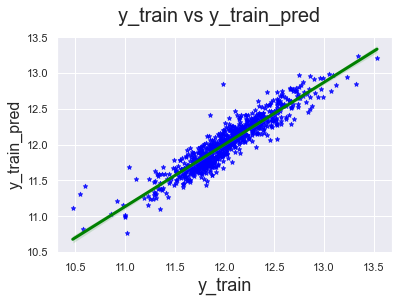

In [155]:
# Plotting graph b/w actual and predicted values with train data

fig = plt.figure()
# sns.scatterplot(y_test,y_test_pred)
sns.regplot(x=y_train,y=y_pred_train, scatter_kws = {"color": 'blue',"s": 20}, line_kws = {"color": 'green', "lw": 3}, marker='*')
fig.suptitle('y_train vs y_train_pred', fontsize = 20)              
plt.xlabel('y_train', fontsize = 18)                          
plt.ylabel('y_train_pred', fontsize = 16)
plt.show()

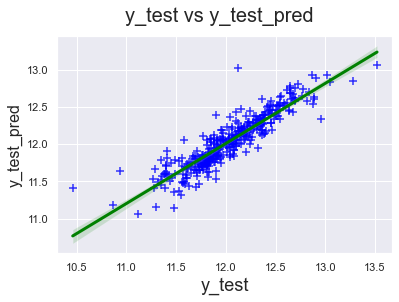

In [156]:
# Plotting graph b/w actual and predicted values with test data

fig = plt.figure()
# sns.scatterplot(y_test,y_test_pred)
sns.regplot(x=y_test,y=y_pred_test, scatter_kws = {"color": 'blue',"s": 50}, line_kws = {"color": 'green', "lw": 3}, marker='+')
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_pred', fontsize = 16)
plt.show()

Residual Analysis of Train

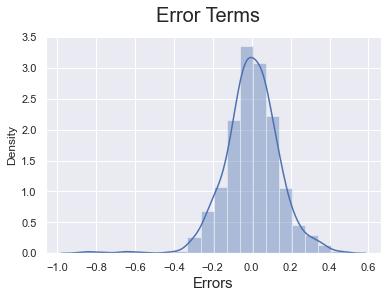

In [157]:
res = y_train - y_pred_train
fig = plt.figure()
sns.distplot(res,bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=15)
plt.show()

Residual Analysis of Test

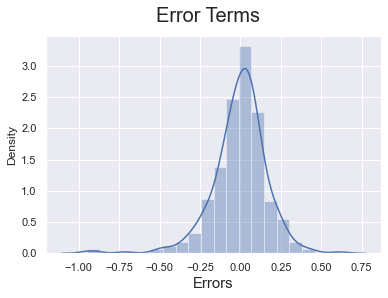

In [158]:
res = y_test - y_pred_test
fig = plt.figure()
sns.distplot(res,bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=15)
plt.show()

Based on this, we can see that using regular Linear Regression:

Residuals are centered around 0 and normally distributed which satisfies linear regression assumptions
Both train and test predictions are linear in nature compared to the actual values
Train r2 score is : 0.8537384198703117
Test r2 score is : 0.8348252098171571
We will move ahead with Lasso and Ridge Regression to perform regulaization which helps models perform well with unseen data while identifying necessary underlying patterns in it.

In both Ridge and Lasso regression, which both allow some bias to get a significant decrease in variance, thereby pushing the model coefficients towards 0.
In Lasso, some of these coefficients become 0, thus resulting in model selection and, hence, easier interpretation, particularly when the number of coefficients is very large.

Linear Regression features and coefficients

In [159]:
df_linear = pd.DataFrame(index=X_train_rfe.columns)
df_linear.rows = X_train_rfe.columns
df_linear['Linear'] = lm.params
df_linear

,Linear
LotArea,4.003364e-01
OverallQual,1.055174e+00
OverallCond,2.175182e-01
MasVnrArea,1.790798e-01
BsmtFullBath,2.066209e-01
BsmtHalfBath,3.295985e-02
FullBath,3.202375e-01
BedroomAbvGr,2.908097e-01
KitchenAbvGr,-2.029637e-01
Fireplaces,1.654835e-01


In [160]:
# List of 32 features
names = X_train_rfe.columns
print(len(names))
print(list(names))

68
['LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'Age_GarageYrBlt_Years', 'MSZoning_RH', 'LotShape_IR3', 'LandContour_Low', 'LandContour_Lvl', 'Neighborhood_Blueste', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_SWISU', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'BldgType_Twnhs', 'HouseStyle_2.5Fin', 'RoofStyle_Mansard', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_ImStucc', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_VinylSd', 'Exterior2nd_AsphShn', 'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'ExterCond_Po', 'Foundation_Stone', 'Foundation_Wood', 'BsmtCond_Gd

Lasso Regression

In [161]:
# Import required libaries for Ridge, Lasso and GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [162]:
# Get only 32 features for both X_train and X_test
X_train = X_train[names]
X_test = X_test[names]

In [163]:
print(X_train.shape)
print(X_test.shape)

(817, 68)
(351, 68)


In [164]:
# list of alphas to tune

params = { 'alpha' : [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,
                       0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,
                      8.0,9.0,10.0,20,50,100,500,1000]}

In [165]:
# Applying lasso regression with 5 fold cross validation

lasso = Lasso()
folds = 5
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [166]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.019664,0.020257,0.003006,0.001259,0.0001,{'alpha': 0.0001},-0.115172,-0.112275,-0.112165,-0.128831,-0.139113,-0.121511,0.010736,2,-0.104717,-0.105116,-0.106801,-0.103285,-0.099888,-0.103961,0.002325
1,0.003065,0.000450,0.003106,0.001552,0.001,{'alpha': 0.001},-0.116170,-0.117538,-0.115462,-0.124097,-0.124618,-0.119577,0.003963,1,-0.112911,-0.113409,-0.113659,-0.110277,-0.110063,-0.112064,0.001566
2,0.004860,0.003458,0.002526,0.000846,0.01,{'alpha': 0.01},-0.142698,-0.149339,-0.145387,-0.152864,-0.147876,-0.147633,0.003456,3,-0.146035,-0.146964,-0.147329,-0.144646,-0.144677,-0.145930,0.001119
3,0.004432,0.001659,0.002306,0.000457,0.05,{'alpha': 0.05},-0.279276,-0.297336,-0.283548,-0.295107,-0.308138,-0.292681,0.010292,4,-0.293062,-0.289027,-0.290750,-0.293366,-0.292140,-0.291669,0.001604
4,0.007000,0.006256,0.002474,0.001073,0.1,{'alpha': 0.1},-0.289808,-0.307741,-0.294898,-0.306851,-0.315869,-0.303033,0.009408,5,-0.306299,-0.300852,-0.304174,-0.302122,-0.299077,-0.302505,0.002522


In [167]:
cv_results.shape

(28, 21)

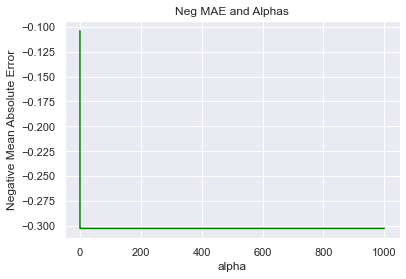

In [168]:
# Plotting train scores with alpha

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], color='green')
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Neg MAE and Alphas")
plt.show()

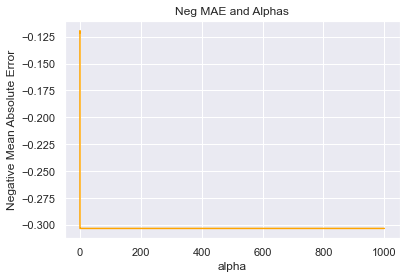

In [169]:
# Plotting testing scores with alpha
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], color='orange')
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Neg MAE and Alphas")
plt.show()

Getting the optimal value of lambda

In [170]:
optimalvalue_lasso = model_cv.best_params_['alpha']
optimalvalue_lasso

0.001

Build final Lasso Regression model

In [171]:
alpha = optimalvalue_lasso
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [172]:
lasso.coef_

array([ 0.11308141,  1.1188508 ,  0.19472765,  0.13751017,  0.20046419,
        0.        ,  0.30220574,  0.23445864, -0.0014506 ,  0.20483296,
        0.41421072,  0.1495796 , -0.08283529, -0.        , -0.        ,
        0.02198651,  0.        , -0.        ,  0.        ,  0.08455009,
        0.14016399, -0.02450708, -0.01317055,  0.0878952 ,  0.08434072,
        0.        ,  0.10904803,  0.04878325,  0.04498594,  0.        ,
        0.02786126,  0.        ,  0.        ,  0.        , -0.15112576,
        0.        ,  0.        , -0.        , -0.        ,  0.0758917 ,
        0.        ,  0.00518724,  0.        ,  0.03261357,  0.        ,
        0.00167523, -0.        ,  0.        ,  0.        , -0.        ,
        0.06481518,  0.07909763, -0.04487225, -0.        , -0.05687739,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.00797988])

Lasso features and their co-efficients

In [173]:
df_lasso = pd.DataFrame(index=X_train.columns)
df_lasso.rows = X_train.columns
df_lasso['Lasso'] = lasso.coef_
df_lasso

,Lasso
LotArea,0.113081
OverallQual,1.118851
OverallCond,0.194728
MasVnrArea,0.137510
BsmtFullBath,0.200464
BsmtHalfBath,0.000000
FullBath,0.302206
BedroomAbvGr,0.234459
KitchenAbvGr,-0.001451
Fireplaces,0.204833


Lasso Regression Model Evaluation

In [174]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric_l = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric_l.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric_l.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric_l.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric_l.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric_l.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric_l.append(mse_test_lr**0.5)

Train r2 score is : 0.8479750803652376
Test r2 score is : 0.8245427188663395
Train RSS score is : 19.261842090232435
Test RSS score is : 10.100326509031355
Train MSE score is : 0.023576306107995635
Test MSE score is : 0.02877585900008933


Ridge Regression

In [175]:
# Import required libaries for Ridge, Lasso and GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [176]:
# Get only 32 features for both X_train and X_test
X_train = X_train[names]
X_test = X_test[names]

In [177]:
print(X_train.shape)
print(X_test.shape)

(817, 68)
(351, 68)


In [178]:
# list of alphas to tune

params = { 'alpha' : [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,
                       0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,
                      8.0,9.0,10.0,20,50,100,500,1000]}

In [179]:
# Applying lasso regression with 5 fold cross validation

ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [180]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.025455,0.017288,0.004385,0.002525,0.0001,{'alpha': 0.0001},-0.118632,-0.111832,-0.111593,-0.132075,-0.142723,-0.123371,0.012203,22,-0.103783,-0.104093,-0.105837,-0.102627,-0.098644,-0.102997,0.002407
1,0.024105,0.008044,0.003413,0.001705,0.001,{'alpha': 0.001},-0.118619,-0.111833,-0.111593,-0.132066,-0.142652,-0.123353,0.012180,21,-0.103786,-0.104095,-0.105839,-0.102630,-0.098646,-0.102999,0.002407
2,0.016695,0.004225,0.002956,0.002144,0.01,{'alpha': 0.01},-0.118493,-0.111844,-0.111592,-0.131976,-0.141952,-0.123171,0.011954,20,-0.103820,-0.104120,-0.105863,-0.102651,-0.098666,-0.103024,0.002410
3,0.015718,0.002402,0.002331,0.000515,0.05,{'alpha': 0.05},-0.117967,-0.111900,-0.111605,-0.131589,-0.139275,-0.122467,0.011096,18,-0.103969,-0.104230,-0.105963,-0.102739,-0.098853,-0.103151,0.002383
4,0.037886,0.053237,0.004315,0.001550,0.1,{'alpha': 0.1},-0.117380,-0.111966,-0.111629,-0.131149,-0.136652,-0.121755,0.010273,16,-0.104139,-0.104356,-0.106081,-0.102837,-0.099245,-0.103332,0.002289


In [181]:
cv_results.shape

(28, 21)

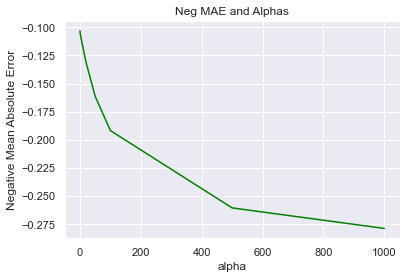

In [182]:
# Plotting train scores with alpha

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], color='green')
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Neg MAE and Alphas")
plt.show()

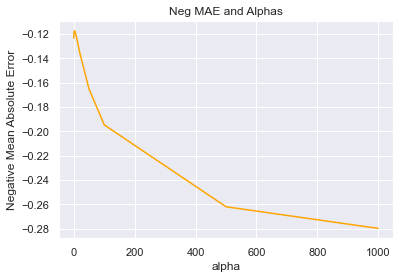

In [183]:
# Plotting testing scores with alpha
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], color='orange')
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Neg MAE and Alphas")
plt.show()

Getting the optimal value of lambda

In [184]:
optimalvalue_ridge = model_cv.best_params_['alpha']
optimalvalue_ridge

2.0

In [185]:
alpha = optimalvalue_ridge
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=2.0)

In [186]:
ridge.coef_

array([ 0.21257112,  0.88880925,  0.21722845,  0.18745458,  0.20453704,
        0.03272604,  0.33867768,  0.25886636, -0.14590617,  0.20894871,
        0.40105886,  0.14848113, -0.12679865, -0.04682619, -0.05354594,
        0.04495352,  0.01802701, -0.06720389,  0.01639216,  0.11004701,
        0.17612745, -0.13462686, -0.12748371,  0.13138915,  0.12771261,
        0.04625637,  0.19048421,  0.13889072,  0.07201802,  0.12718971,
        0.11053815,  0.04130348,  0.05995449,  0.05870631, -0.15270423,
        0.03177307,  0.05800954, -0.0180483 , -0.14655242,  0.10617146,
        0.        ,  0.04365455,  0.08586417,  0.0443621 ,  0.01224468,
       -0.02288449, -0.10173531, -0.00123232,  0.05019145, -0.1020004 ,
        0.09678969,  0.10854778, -0.04530689, -0.04968924, -0.09452697,
       -0.01022308,  0.        , -0.01619936, -0.13622345, -0.10290231,
       -0.00883948,  0.03257902, -0.00356757,  0.05991702,  0.04668889,
        0.02463691, -0.0019121 , -0.01937251])

Ridge features and their co-efficients

In [187]:
df_ridge = pd.DataFrame(index=X_train.columns)
df_ridge.rows = X_train.columns
df_ridge['Ridge'] = ridge.coef_
df_ridge

,Ridge
LotArea,0.212571
OverallQual,0.888809
OverallCond,0.217228
MasVnrArea,0.187455
BsmtFullBath,0.204537
BsmtHalfBath,0.032726
FullBath,0.338678
BedroomAbvGr,0.258866
KitchenAbvGr,-0.145906
Fireplaces,0.208949


Ridge Regression Model Evaluation

In [188]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric_r = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric_r.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric_r.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric_r.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric_r.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric_r.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric_r.append(mse_test_lr**0.5)

Train r2 score is : 0.8610773801671192
Test r2 score is : 0.8246602993311123
Train RSS score is : 17.60175616215529
Test RSS score is : 10.093557903718333
Train MSE score is : 0.021544377187460575
Test MSE score is : 0.028756575224268756


Comparison of co-efficients after Regularization

In [189]:
comparison = pd.DataFrame(index=X_train.columns)
comparison.rows = X_train.columns

comparison['Linear'] = lm.params
comparison['Ridge'] = ridge.coef_
comparison['Lasso'] = lasso.coef_

In [190]:
comparison.sort_values(by='Lasso', ascending=False)

,Linear,Ridge,Lasso
OverallQual,1.055174e+00,0.888809,1.118851
GarageCars,3.808657e-01,0.401059,0.414211
FullBath,3.202375e-01,0.338678,0.302206
BedroomAbvGr,2.908097e-01,0.258866,0.234459
Fireplaces,1.654835e-01,0.208949,0.204833
BsmtFullBath,2.066209e-01,0.204537,0.200464
OverallCond,2.175182e-01,0.217228,0.194728
WoodDeckSF,1.359339e-01,0.148481,0.149580
Neighborhood_Crawfor,1.892567e-01,0.176127,0.140164
MasVnrArea,1.790798e-01,0.187455,0.137510


Observations

There are 32 significant features in the model
The features are sorted in the order of decreasing significance of the co-efficients (i.e. The most significant feature is at the top, followed by the next significant one and so on...)
The co-efficients are very close for Ridge and Lasso Regression models post regularization with slight variance to the model created by Linear Regression
However, the resultant selection of significant feature order still remains the same

# Comparison of metrics after Regularization

In [191]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric_lr
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )
rg_metric = pd.Series(metric_r, name = 'Ridge Regression')
ls_metric = pd.Series(metric_l, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.866854,0.861077,0.847975
1,R2 Score (Test),0.821834,0.824660,0.824543
2,RSS (Train),16.869865,17.601756,19.261842
3,RSS (Test),10.256248,10.093558,10.100327
4,MSE (Train),0.143696,0.146780,0.153546
5,MSE (Test),0.170939,0.169578,0.169634


Observations

The R2 Score, RSS and MSE are all very close for Linear Regression, Ridge and Lasso
Lasso has better scores by a very slight margin compared to Ridge and Linear Regression